# Neural & Behavioral Modeling - Week 12 (Exercises)
by 駱皓正 (austenpsy@gmail.com)

In [ ]:
# Upgrade PyTorch to 0.4.0 if necessary:
! conda install -y pytorch-cpu torchvision-cpu -c pytorch

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np

In [2]:
# Check GPU status:
import torch as t
print('PyTorch version:',t.__version__)
use_cuda=t.cuda.is_available()
if(use_cuda):
    for i in range(t.cuda.device_count()):
        print('Device ',i,':',t.cuda.get_device_name(i))
    print('Current: Device ',t.cuda.current_device())
    t.backends.cudnn.benchmark = True 
    device = t.device("cuda")
else:
    device = t.device("cpu")
    print('No GPU')

PyTorch version: 0.4.0
No GPU


## 1 Fair Performance Evaluation (5 points)
We often compare and assess performances of different model architectures/parameters/hyperparameters. Note that the results are differnt even if you re-run exactly the same code block. This is primarily due to a non-fixed random number seed. Please:

(1) run the section 1.2 TEN times and report (a) min, (b) max, (c) mean, & (d) standard deviation of the TESTING accuracies. (3 points)

(2) try to fix the random number seeds in numpy & pytorch to see if you can obtain the same results every time in the section 1.2. (2 points)

### 1.0 CIFAR-10 dataset

In [4]:
# Load the dataset:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
train_set = CIFAR10(root='.', train=True, transform=transforms.ToTensor())
train_data = t.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_set = CIFAR10(root='.', train=False, transform=transforms.ToTensor())
test_data = t.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### 1.1 The model

In [6]:
# Make the model:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() # = nn.Module.__init__(self)
        self.conv1 = nn.Conv2d(3, 6, 5) # in, out, kernel
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
    def forward(self, x): # functional expressions
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x
lenet = Net()
lenet = lenet.to(device)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(lenet.parameters())

### 1.2 Training & Testing

In [ ]:
# original codes
# Training:
for e in range(2):
    for i, (X_train, Y_train) in enumerate(train_data, 0):
        X_train,Y_train=X_train.to(device),Y_train.to(device)
        Y_pred = lenet(X_train)
        loss = loss_fn(Y_pred, Y_train)
        lenet.zero_grad()
        loss.backward()
        optimizer.step()   
        Y_pred = lenet(X_train)
        Y_pred = t.max(Y_pred,1)[1]
    print('epoch ',e,':',(Y_pred==Y_train).sum().item()/Y_train.shape[0])
    
# Testing on a batch:
dataiter = iter(test_data)
X_test, Y_test = dataiter.next() # returning a batch
X_test,Y_test=X_test.to(device),Y_test.to(device)
with t.no_grad():
    Y_pred = lenet(X_test)
    Y_pred = t.max(Y_pred,1)[1]
    print('test :',(Y_pred==Y_test).sum().item()/Y_test.shape[0])

In [15]:
#answer
ans = []
for count in range(10):
    print('Try :', count+1)
    # Training:
    for e in range(2):
        for i, (X_train, Y_train) in enumerate(train_data, 0):
            X_train,Y_train=X_train.to(device),Y_train.to(device)
            Y_pred = lenet(X_train)
            loss = loss_fn(Y_pred, Y_train)
            lenet.zero_grad()
            loss.backward()
            optimizer.step()   
            Y_pred = lenet(X_train)
            Y_pred = t.max(Y_pred,1)[1]
        #print('epoch ',e,':',(Y_pred==Y_train).sum().item()/Y_train.shape[0])

    # Testing on a batch:
    dataiter = iter(test_data)
    X_test, Y_test = dataiter.next() # returning a batch
    X_test,Y_test=X_test.to(device),Y_test.to(device)
    with t.no_grad():
        Y_pred = lenet(X_test)
        Y_pred = t.max(Y_pred,1)[1]
        testout = (Y_pred==Y_test).sum().item()/Y_test.shape[0]
        print('test :',testout)
    ans.append(testout)

ansarray = np.asarray(ans)
print('Max  :',max(ans),' Min  :',min(ans),' Mean :',np.mean(ansarray),' Std  :',np.std(ansarray))

Try : 1
test : 0.732
Try : 2
test : 0.758
Try : 3
test : 0.743
Try : 4
test : 0.78
Try : 5
test : 0.76
Try : 6
test : 0.804
Try : 7
test : 0.77
Try : 8
test : 0.793
Try : 9
test : 0.789
Try : 10
test : 0.799
Max  : 0.804  Min  : 0.732  Mean : 0.7728  Std  : 0.023077261536


In [84]:
# Q:1-2
import torch as torch
'''
data_tf = transforms.Compose([
         transforms.ToTensor(), # range [0, 255] -> [0.0,1.0]
         transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)), 
                             ])
'''
#setting seed
torch.manual_seed(0)
np.random.seed(0)

train_set = CIFAR10(root='.', train=True, transform=transforms.ToTensor())
train_data = t.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_set = CIFAR10(root='.', train=False, transform=transforms.ToTensor())
test_data = t.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [85]:
# Make the model:
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(0)
np.random.seed(0)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() # = nn.Module.__init__(self)
        self.conv1 = nn.Conv2d(3, 6, 5) # in, out, kernel
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
    def forward(self, x): # functional expressions
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x
lenet = Net()
lenet = lenet.to(device)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(lenet.parameters())

In [86]:
# Training:
for count in range(2):
    for e in range(2):
        torch.manual_seed(0)
        np.random.seed(0)
        for i, (X_train, Y_train) in enumerate(train_data, 0):
            X_train,Y_train=X_train.to(device),Y_train.to(device)
            Y_pred = lenet(X_train)
            loss = loss_fn(Y_pred, Y_train)
            lenet.zero_grad()
            loss.backward()
            optimizer.step()   
            Y_pred = lenet(X_train)
            Y_pred = t.max(Y_pred,1)[1]
        print('epoch ',e,':',(Y_pred==Y_train).sum().item()/Y_train.shape[0])
    
    torch.manual_seed(0)
    np.random.seed(0)
    # Testing on a batch:
    dataiter = iter(test_data)
    X_test, Y_test = dataiter.next() # returning a batch
    X_test,Y_test=X_test.to(device),Y_test.to(device)
    with t.no_grad():
        Y_pred = lenet(X_test)
        Y_pred = t.max(Y_pred,1)[1]
        print('test :',(Y_pred==Y_test).sum().item()/Y_test.shape[0])

epoch  0 : 0.3125
epoch  1 : 0.3125
test : 0.532
epoch  0 : 0.375
epoch  1 : 0.375
test : 0.58


### 1.3 Your answers

The answers of Q1 is shown above. After performed the section 1.2 ten times, the statistics of ten accuracies is calculated. Max = 0.804, Min = 0.732, Mean = 0.7728, Std = 0.023077261536. The results articulate that there exists some differences between each executions due to the random setting. 

The answers of Q2 can be observed via the simulation done above. After setting the seed of pytorch and numpy only. There still exists some random factors causing the differences between each executions, indicating my controls of pytorch and numpy seed setting are not enough.

## 2 Universal Approximation Theorem (5 points)

Please FAIRLY evaluate whether a deep network learns XOR more efficiently than a shallow network with the same number of model parameters. Please discuss why in either case.

### 2.0 XOR data

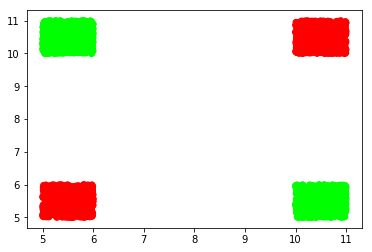

In [25]:
N=1000 # samples per cluster
XY=t.tensor([[5,5],[5,10],[10,5],[10,10]],dtype=t.float32) # 4 cluster centers
Z=t.tensor([0,1,1,0]) # category labels
t.cat([t.randn(2,1)+XY[0,0],t.randn(2,1)+XY[0,1]],1)
xy,z=t.zeros(4*N,2),t.zeros(4*N,dtype=t.int64)
for i in range(4):
    xy[i*N:(i+1)*N,]=t.rand(N,2)+XY[i,]
    z[i*N:(i+1)*N]=Z[i]
xy_np=xy.numpy()
z_np=z.numpy().astype(int)
cmap=np.array([[1,0,0],[0,1,0]])
scatter(xy_np[:,0],xy_np[:,1],color=cmap[z_np]);

#### 2.1 A shallow net with one hidden layer

In [61]:
# Number of free parameters: 2*H+H*2=70

H=35 # number of hidden units
model = t.nn.Sequential(
    t.nn.Linear(2, H, bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, 2, bias=False),
    t.nn.Softmax(dim=1)
)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters())

shallow = []
for i in range(100):
    shallow.append([])

for j in range(100):
    for i in range(100):
        z_pred = model(xy)
        loss = loss_fn(z_pred,z)
        model.zero_grad()
        loss.backward()
        optimizer.step()
        z_pred = model(xy) 
        z_pred = t.max(z_pred,1)[1]
        shallow[j].append((z_pred==z).sum().item()/xy.shape[0])
        #if (i == 0 or shallow[-1] != shallow[-2]):
            #print('epoch ',i,':',(z_pred==z).sum().item()/xy.shape[0])
print("complete")

complete


In [63]:
def defmean(matrix, n):
    meanlist=[]
    for j in range(n):
        temp = 0
        for i in range(n):
            temp += matrix[i][j]
        temp /= n
        meanlist.append(temp)
    return meanlist

def defstd(matrix, n):
    stdlist=[]
    for j in range(n):
        temp = []
        for i in range(n):
            temp.append(matrix[i][j])
        std = np.std(np.asarray(temp))
        stdlist.append(std)
    return stdlist

MEAN = defmean(shallow, 100)
STD = defstd(shallow, 100)

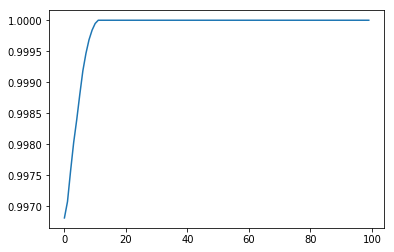

In [64]:
plot(range(100), MEAN)

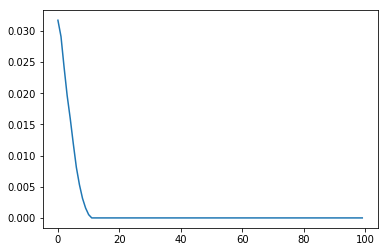

In [65]:
plot(range(100), STD)

#### 2.2 A "deep" net with three hidden layers

In [66]:
# Number of free parameters: 2*H+H*H+H*H+H*2=70

H=5 # number of hidden units
model = t.nn.Sequential(
    t.nn.Linear(2, H, bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, H,bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, H, bias=False),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    t.nn.Linear(H, 2, bias=False),
    t.nn.Softmax(dim=1)
)
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters())

deep = []
for i in range(100):
    deep.append([])

for j in range(100):
    for i in range(100):
        z_pred = model(xy)
        loss = loss_fn(z_pred,z)
        model.zero_grad()
        loss.backward()
        optimizer.step()
        z_pred = model(xy) 
        z_pred = t.max(z_pred,1)[1]
        deep[j].append((z_pred==z).sum().item()/xy.shape[0])
        #if (i == 0 or deep[-1] != deep[-2]):
            #print('epoch ',i,':',(z_pred==z).sum().item()/xy.shape[0])
print("complete")

complete


In [67]:
DMEAN = defmean(deep, 100)
DSTD = defstd(deep, 100)

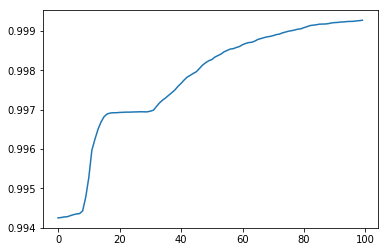

In [68]:
plot(range(100), DMEAN)

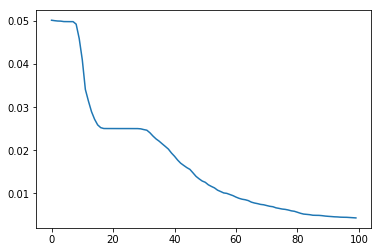

In [69]:
plot(range(100), DSTD)

In [89]:
from scipy.stats import *
ttest_rel(DMEAN,MEAN)

Ttest_relResult(statistic=-17.4548960079388, pvalue=5.6000000198988419e-32)

### 2.3 Your answers

For eliminating the error, in either shallow or deep model, 100 executions are performed. The growth curves in two models is the average of curves of  100 executions. By observing the results above, we can find that in THIS case, the performance in the shallow model is significantly better than deep model. BUT the time complexity of shallow model is worse than deep model. 